In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import calendar
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
useCol = ['pickup_datetime', 'dropoff_datetime',
                                          'vendor_id','passenger_count','trip_distance',
                                          'pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude',
                                          'payment_type','fare_amount','surcharge',
                                          'mta_tax','tip_amount','tolls_amount',
                                          'total_amount']

In [4]:
df_chunk = pd.read_csv('nyc_taxi_data_2014.csv',usecols = useCol,chunksize =1e6)

In [147]:
def chunk_processing(df):
    df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
    df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])
#    df['pickup_month'] = df['pickup_datetime'].apply(lambda x: calendar.month_name[x.weekday()])
    df['pickup_day'] = df['pickup_datetime'].apply(lambda x: calendar.day_name[x.weekday()])
    df['pickup_hour'] = df['pickup_datetime'].dt.strftime('%H')
    df['week_number'] = df['pickup_datetime'].apply(lambda x:x.isocalendar()[1])
    df['trip_duration'] = (df['dropoff_datetime'] - df['pickup_datetime']).apply(lambda x: x.total_seconds()/60.0)
    selectedCol = ['vendor_id',
                   'pickup_day',
                   'pickup_hour',
                   'week_number',
                   'trip_duration',
                   'trip_distance',
 #                  'pickup_latitude',
 #                  'pickup_longitude',
 #                  'dropoff_latitude',
 #                  'dropoff_longitude',
                   'passenger_count',
                   'payment_type',
                   'fare_amount',
                   'surcharge',
                   'mta_tax',
                   'tip_amount',
                   'tolls_amount',
                   'total_amount']
    types = {'vendor_id': str,
         'pickup_day': str,
         'pickup_hour': np.uint8,
         'week_number': np.uint8,
         'trip_duration': np.float64,
         'trip_distance': np.float64,
#         'pickup_latitude': np.float32,
#         'pickup_longitude': np.float32,
#         'dropoff_latitude': np.float32,
#         'dropoff_longitude': np.float32,   
         'passenger_count': np.uint8,
         'payment_type': str,
         'fare_amount': np.float64,
         'surcharge': np.float64,
         'mta_tax': np.float64,
         'tip_amount': np.float64,
         'tolls_amount': np.float64,
         'total_amount': np.float64        
        }
    return df[selectedCol].astype(types)

In [6]:
df_list = []
for chunk in df_chunk:
    df = chunk_processing(chunk)
    df_list.append(df)
df = pd.concat(df_list,ignore_index = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999999 entries, 0 to 14999998
Data columns (total 18 columns):
vendor_id            object
pickup_day           object
pickup_hour          uint8
week_number          uint8
trip_duration        float64
trip_distance        float64
pickup_latitude      float32
pickup_longitude     float32
dropoff_latitude     float32
dropoff_longitude    float32
passenger_count      uint8
payment_type         object
fare_amount          float64
surcharge            float64
mta_tax              float64
tip_amount           float64
tolls_amount         float64
total_amount         float64
dtypes: float32(4), float64(8), object(3), uint8(3)
memory usage: 1.5+ GB


In [8]:
df.describe()

,pickup_hour,week_number,trip_duration,trip_distance,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,passenger_count,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
count,1.500000e+07,1.500000e+07,1.500000e+07,1.500000e+07,1.500000e+07,1.500000e+07,1.499985e+07,1.499985e+07,1.500000e+07,1.500000e+07,1.500000e+07,1.500000e+07,1.500000e+07,1.500000e+07,1.500000e+07
mean,1.357063e+01,3.361916e+00,1.232236e+01,2.792074e+00,3.691571e+01,-6.597710e+01,3.686418e+01,-6.592606e+01,1.701826e+00,1.201335e+01,3.145898e-01,4.982227e-01,1.455907e+00,2.404203e-01,1.452348e+01
std,6.436939e+00,1.646231e+00,1.757262e+01,3.326122e+00,5.188750e+00,1.135108e+01,5.263600e+00,1.207701e+01,1.390736e+00,1.006726e+01,3.633407e-01,2.975721e-02,2.244646e+00,1.191025e+00,1.216687e+01
min,0.000000e+00,1.000000e+00,-1.886030e+04,0.000000e+00,-1.800000e+02,-7.366000e+02,-1.800000e+02,-7.754167e+02,0.000000e+00,2.500000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+00
25%,9.000000e+00,2.000000e+00,6.000000e+00,1.000000e+00,4.073535e+01,-7.399198e+01,4.073420e+01,-7.399135e+01,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,8.000000e+00
50%,1.400000e+01,3.000000e+00,1.000000e+01,1.700000e+00,4.075298e+01,-7.398183e+01,4.075337e+01,-7.398006e+01,1.000000e+00,9.000000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.100000e+01
75%,1.900000e+01,4.000000e+00,1.600000e+01,3.080000e+00,4.076724e+01,-7.396735e+01,4.076839e+01,-7.396351e+01,2.000000e+00,1.350000e+01,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,1.610000e+01
max,2.300000e+01,9.000000e+00,1.951730e+04,1.000000e+02,7.328431e+01,8.054390e+01,4.040833e+02,1.193360e+02,2.080000e+02,5.000000e+02,1.340000e+01,5.000000e-01,2.000000e+02,2.000000e+01,7.000000e+02


##Total amount by day and hour

In [42]:
aggdf = df.groupby(['vendor_id','pickup_day','pickup_hour','payment_type']).agg(sum).reset_index()

In [102]:
orderList = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

Text(0.5, 1.0, 'Figure 1: Total amount by day of week')

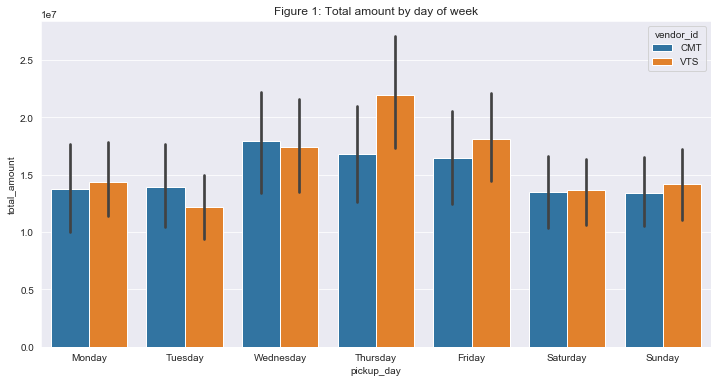

In [144]:
plt.figure(figsize = (12,6))
sns.set_style('darkgrid')
sns.despine()
sns.barplot(x='pickup_day',y='total_amount',hue='vendor_id',data = aggdf,order = orderList,
            estimator = sum).set_title("Figure 1: Total amount by day of week")

In [135]:
aggdf1 = df.groupby(['vendor_id','pickup_day']).agg({'week_number':'count','total_amount':'mean'}).reset_index()#.melt(id_vars = ['vendor_id','pickup_day'],var_name = "indicators",value_name = "amount")
aggdf1.rename(columns = {'week_number':'count','total_amount':'avg_amount'},inplace=True)
aggdf1 = aggdf1.set_index("pickup_day").loc[orderList].reset_index()

<Figure size 864x432 with 0 Axes>

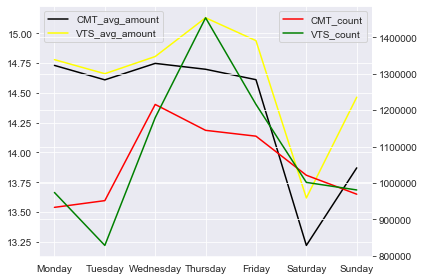

In [142]:
fig = plt.figure(figsize = (12,6))
barWidth = 0.85
fig, ax = plt.subplots()
ax.plot(aggdf1[aggdf1['vendor_id'] == "CMT"]['pickup_day'],aggdf1[aggdf1['vendor_id'] == "CMT"]['avg_amount'],label = 'CMT_avg_amount',
       color = "black")
ax.plot(aggdf1[aggdf1['vendor_id'] == "VTS"]['pickup_day'],aggdf1[aggdf1['vendor_id'] == "VTS"]['avg_amount'],label = 'VTS_avg_amount',
       color = "yellow")
ax2 = ax.twinx()
ax2.plot(aggdf1[aggdf1['vendor_id'] == "CMT"]['pickup_day'],aggdf1[aggdf1['vendor_id'] == "CMT"]['count'],label = 'CMT_count',
        color = "red")
ax2.plot(aggdf1[aggdf1['vendor_id'] == "VTS"]['pickup_day'],aggdf1[aggdf1['vendor_id'] == "VTS"]['count'],label = 'VTS_count',
        color = "green")
ax.set_ylabel = 'avg amount'
ax2.set_ylable = 'count'
ax.legend()
ax2.legend()
fig.tight_layout()

##Percentage charge by transaction type

In [13]:
aggdf1 = df.groupby(['payment_type']).agg('sum').reset_index()

Text(0.5, 1.0, 'Figure 3: Percentage charge by transaction type')

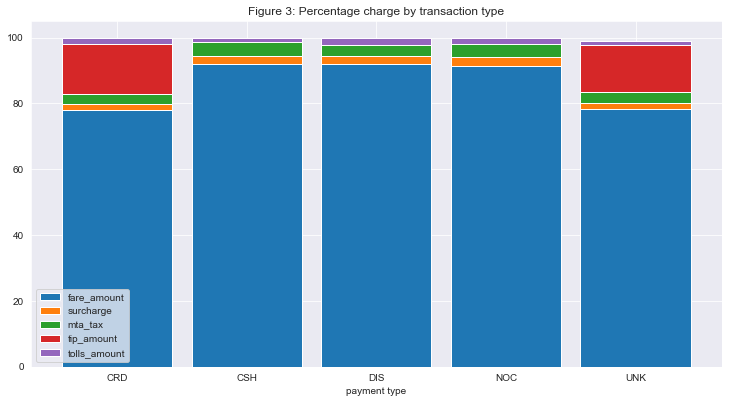

In [16]:
fig = plt.figure(figsize = (12,6))
barWidth = 0.85
axes = fig.add_axes([0.1,0.1,0.8,0.8])
txnTypeList = ['fare_amount','surcharge','mta_tax','tip_amount','tolls_amount'] 
for i in np.arange(0,len(txnTypeList)):
        axes.bar(aggdf1['payment_type'],aggdf1[txnTypeList[i]]/aggdf1['total_amount']* 100,
                 bottom = aggdf1[txnTypeList[0:i]].sum(axis = 1)/aggdf1['total_amount']* 100,
                 edgecolor = 'white',width = barWidth, label = txnTypeList[i])
        axes.set_xlabel('payment type')
axes.legend(loc = 0)
axes.set_title('Figure 3: Percentage charge by transaction type')

In [ ]:
## total amount by hour of day

Text(0.5, 1.0, 'Figure 4: Total amount by hour of day')

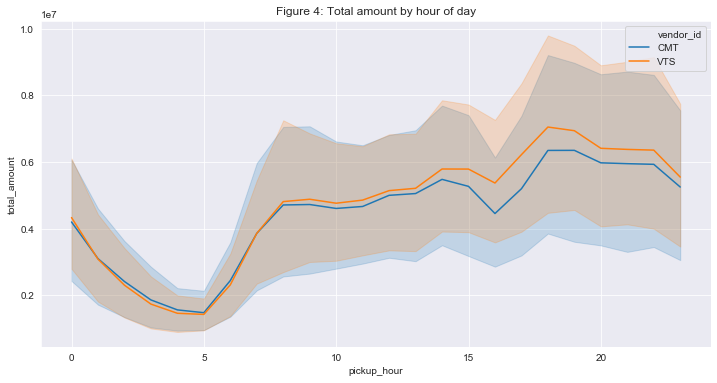

In [148]:
plt.figure(figsize = (12,6))
sns.set_style('darkgrid')
sns.despine()
sns.lineplot(x='pickup_hour',y='total_amount',hue='vendor_id',data = aggdf,
            estimator = sum).set_title("Figure 4: Total amount by hour of day")

In [36]:
aggdf2 = df.groupby('pickup_hour').agg('mean').reset_index()[['pickup_hour','trip_duration','trip_distance','passenger_count',
                                                              'fare_amount','tip_amount','total_amount']]

Text(0.5, 1.0, 'Figure 5: Average index / trip by hour of day')

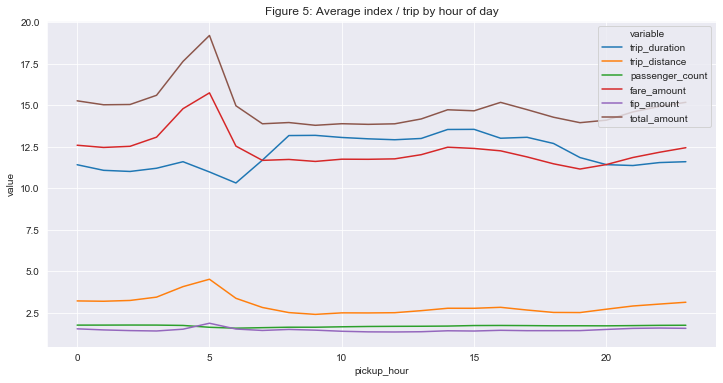

In [149]:
plt.figure(figsize = (12,6))
sns.set_style('darkgrid')
sns.despine()
sns.lineplot(x='pickup_hour',y='value',hue='variable', data = pd.melt(aggdf2, ['pickup_hour'])).set_title("Figure 5: Average index / trip by hour of day")

In [146]:
aggdf2

,pickup_hour,trip_duration,trip_distance,passenger_count,fare_amount,tip_amount,total_amount
0,0,11.411302,3.213062,1.756535,12.585239,1.533561,15.258447
1,1,11.074529,3.193303,1.757662,12.451760,1.467480,15.020331
2,2,11.006484,3.241526,1.761613,12.520334,1.426350,15.037399
3,3,11.199622,3.441300,1.758460,13.070443,1.403331,15.591333
4,4,11.592669,4.073298,1.737096,14.784274,1.511323,17.628949
5,5,10.975942,4.518125,1.626580,15.737263,1.869593,19.192507
6,6,10.313750,3.370244,1.572022,12.531549,1.521366,14.959959
7,7,11.688345,2.818721,1.602898,11.673291,1.435565,13.876813
8,8,13.167627,2.510968,1.630460,11.729173,1.496790,13.950722
9,9,13.179413,2.403078,1.629540,11.609999,1.453500,13.784820
